In [ ]:
import pandas as pd

df = df = pd.read_csv('https://reneshbedre.github.io/assets/posts/tsne/ath_root_sub_seurat_processes.csv')
df = df.set_index(df.columns[0])
dft = df.T
dft = dft.set_index(dft.columns[0])

# check data
dft.head()

gene,RPP1A,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,AT1G02570,BXL2,IMPA6,CSLD5,RPL19A,BGLU11,AT1G02870,RALF1,GSTF7,GSTF6,AT1G03010,AT1G03070,ATRRP4,BSU1,TPX2,SOM,AT1G03820,GRXS13,FLA9,AT1G03920,BARD1,AT1G04040,IAA3,RPS15A,AT1G04280,RPL23C,YUC3,PRMT10,ACO4,PER3,UGT75B1,UGT74E2,...,AT5G62440,HIPL2,ARR6,DOF5.6,BT1.1,FLS3,FLS5,SRK2H,PDF2.5,AAP4,PER69,RPS28C,ANAC104,BXL4,C/VIF2,AT5G64670,AT5G64680,AT5G64690,PEP3,TPPJ,HTR2.4,AT5G65380,AT5G65530,BHLH93,ATMYB68,ACS5,AT5G66230,NAC105,PER72,RAB18,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
AT1G01070,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.51,1.40,-0.26,-0.28,-0.24,-0.14,-0.13,-0.07,-0.29,-0.31,-0.23,0.66,-0.07,1.36,-0.24,0.72,-0.52,-0.05,-0.21,-0.19,-0.34,3.00,-0.06,-0.06,-0.44,5.99,0.18,0.13,-0.17,-0.18,-0.97,-0.25,1.54,-0.49,1.21,-0.15,1.77,-0.29,-0.36,-0.39,-0.58,...,2.87,1.76,-0.03,-0.08,0.39,-0.26,-0.46,-0.55,-0.3,-0.12,-0.49,1.88,-0.14,-0.44,-0.36,0.16,-0.45,-0.33,0.25,1.43,-0.53,-0.52,-0.26,-0.66,-0.34,-0.16,-0.06,-0.21,-0.25,0.64,0.61,-0.55,-0.41,-0.43,2.01,3.01,-0.24,-0.18,-0.34,1.16
-0.22,1.36,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,0.81,-0.31,-0.07,1.20,-0.24,-0.49,-0.52,-0.05,-0.21,-0.19,-0.34,1.86,-0.06,-0.06,-0.44,-0.22,-0.41,0.33,1.29,-0.18,-1.12,-0.25,1.45,-0.49,1.16,-0.15,-0.39,-0.29,-0.38,-0.39,-0.08,...,0.81,2.09,-0.47,-0.08,1.77,0.92,-0.46,1.08,-0.3,-0.12,-0.69,0.79,-0.14,-0.44,-0.36,-0.59,0.93,-0.33,-0.34,1.47,0.47,-0.52,-0.26,-0.66,-0.34,-0.16,-0.06,-0.21,-0.25,1.25,-0.48,-0.55,-0.41,-0.43,-0.24,0.89,-0.24,-0.18,-0.49,-0.68
-0.22,2.49,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,0.99,-0.07,1.97,-0.24,0.39,-0.52,-0.05,1.13,-0.19,-0.34,-0.27,-0.06,-0.06,-0.44,-0.22,-0.77,-0.04,-0.17,-0.18,-0.61,-0.25,2.42,-0.49,2.17,-0.15,0.72,-0.29,-0.18,-0.39,-0.19,...,1.38,-0.32,-0.47,-0.08,-0.62,-0.26,-0.46,-0.55,0.9,-0.12,-0.43,2.80,-0.14,-0.44,-0.36,1.93,0.64,-0.33,-0.34,-0.52,1.20,1.57,-0.26,0.80,0.37,-0.16,-0.06,-0.21,-0.25,-0.52,-0.48,-0.55,2.92,-0.43,-0.24,2.82,-0.24,-0.18,-0.49,1.60
2.24,0.82,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,-0.31,-0.07,1.07,-0.24,-0.49,0.63,-0.05,-0.21,-0.19,-0.34,-0.27,-0.06,-0.06,-0.44,2.61,-0.06,-0.56,-0.17,-0.18,-0.83,-0.25,0.59,-0.49,1.75,-0.15,-0.39,-0.29,-0.57,-0.39,-0.03,...,2.05,-0.32,0.35,-0.08,0.77,-0.26,-0.46,-0.55,-0.3,-0.12,-0.04,0.08,-0.14,-0.44,0.82,1.91,-0.45,-0.33,0.79,0.23,0.80,-0.52,-0.26,-0.66,-0.34,-0.16,-0.06,-0.21,-0.25,-0.52,0.91,-0.55,-0.41,-0.43,-0.24,-0.43,-0.24,-0.18,-0.49,1.95
-0.22,-0.51,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,-0.31,-0.07,0.36,-0.24,2.87,2.61,-0.05,-0.21,-0.19,-0.34,-0.27,-0.06,-0.06,-0.44,-0.22,0.92,-0.99,-0.17,-0.18,-0.18,-0.25,-1.10,-0.49,0.43,-0.15,-0.39,-0.29,0.02,-0.39,-0.58,...,-0.47,1.46,-0.47,-0.08,-0.62,-0.26,-0.46,-0.55,-0.3,-0.12,-0.69,0.60,-0.14,-0.44,-0.36,-0.59,3.73,-0.33,-0.34,-0.52,0.72,-0.52,-0.26,2.02,1.70,-0.16,-0.06,-0.21,3.51,-0.52,-0.48,1.85,-0.41,-0.43,-0.24,-0.43,8.85,-0.18,-0.49,0.16


In [ ]:
# as we have large number variables, we will first do to PCA to keep minimum number 
# of variables for t-SNE
from sklearn.decomposition import PCA
pca_scores = PCA().fit_transform(dft)

# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)

# perform t-SNE on PCs scores
# we will use first 50 PCs but this can vary
# see that "verbose=1" prints out parameters on execution

from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12, n_iter=1000, 
               learning_rate=368, verbose=1).fit_transform(df_pc.loc[:,0:49])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4406 samples in 0.029s...
[t-SNE] Computed neighbors for 4406 samples in 1.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4406
[t-SNE] Computed conditional probabilities for sample 2000 / 4406
[t-SNE] Computed conditional probabilities for sample 3000 / 4406
[t-SNE] Computed conditional probabilities for sample 4000 / 4406
[t-SNE] Computed conditional probabilities for sample 4406 / 4406
[t-SNE] Mean sigma: 4.812347
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.423508
[t-SNE] KL divergence after 1000 iterations: 0.839509


In [ ]:
#check the output
tsne_em

array([[-14.607794 ,  14.828018 ],
       [ -6.3866177,  26.267763 ],
       [-13.084793 , -24.877575 ],
       ...,
       [-31.893396 ,  -9.590995 ],
       [-17.911537 , -34.755623 ],
       [-30.8175   , -16.337988 ]], dtype=float32)

In [ ]:
from sklearn.cluster import DBSCAN
# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
dbscan_m = DBSCAN(eps=3, min_samples=10).fit(tsne_em)


In [ ]:
#dbscan_m.labels_
clabels = dbscan_m.labels_.tolist()

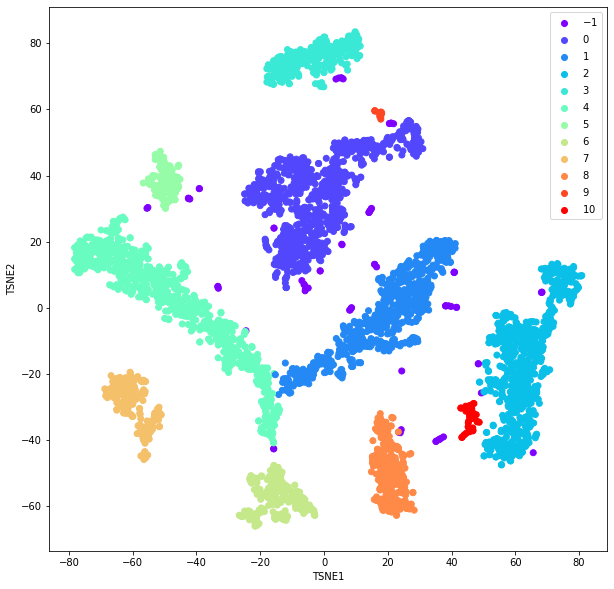

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

#Plot scatterplot for K-means Clustering
scatter = plt.scatter(tsne_em[:,0],tsne_em[:,1], c = dbscan_m.labels_, cmap ='rainbow')
plt.xlabel('TSNE1') 
plt.ylabel('TSNE2')
plt.legend(*scatter.legend_elements())